In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as ml
%matplotlib inline
ml.style.use('ggplot')
import io
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/matches.csv')
df.head(30)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [0]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]

mask1 = df['season'] >= 2010
mask2 = df['season'] <= 2015
mask3 = df['city'] == 'Mumbai'

new = df[mask1 & mask2 & mask3]
pd.DataFrame(new['player_of_match'].value_counts()).reset_index().iloc[0,0]

'KA Pollard'

In [0]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]

mask = df['win_by_runs'] > 50

df1 = df[mask]
pd.DataFrame(new['winner'].value_counts()).reset_index().iloc[0,0]

'Mumbai Indians'

In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]

def fun(t1,t2):
  msk1 = df['team1'] == t1
  msk2 = df['team2'] == t2
  msk3 = df['team1'] == t2
  msk4 = df['team2'] == t1
  filt = df[(msk1 & msk2) | (msk3 & msk4)]
  res = pd.DataFrame(filt['winner'].value_counts())
  li,lv = list(res.index),list(res.values)
  for i in range(len(li)):
    print(li[i]," ",int(lv[i]),"(matches won by {})".format(li[i]))

# test
fun('Kolkata Knight Riders','Chennai Super Kings')

Chennai Super Kings   10 (matches won by Chennai Super Kings)
Kolkata Knight Riders   6 (matches won by Kolkata Knight Riders)


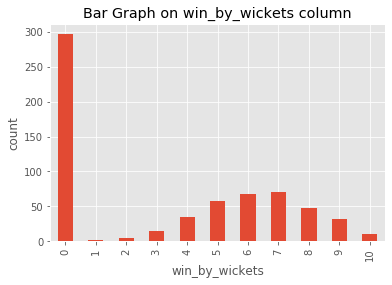

In [0]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]

df.groupby('win_by_wickets')['win_by_wickets'].agg('count').plot(kind='bar')
plt.ylabel('count')
plt.title('Bar Graph on win_by_wickets column')
plt.show()

In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 

def win(team):
  won = df[df['toss_winner']==team]
  won_match = won['winner'].value_counts()[team]
  total =  won['winner'].count()
  print("Win percentage after winning toss : ", (won_match/total)*100,"%")

# test
win('Kolkata Knight Riders')

Win percentage after winning toss :  56.41025641025641 %
